In [9]:
from channel import channel
import h5py
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

In [7]:
filename = "data/210601_NBS295-106/20210601_152616_mass-001.hdf5"
with h5py.File(filename, "r") as hdf_file:
    channels = pd.DataFrame(columns=["energy"], index=hdf_file.keys())

    for channel_name in hdf_file:
        goint_in = np.array(hdf_file[channel_name]["filt_value"])
        goint_in = goint_in[(goint_in > 0) & (goint_in < np.percentile(goint_in, 97))]
        channels.loc[channel_name, "energy"] = goint_in
channels

,energy
chan1,"[1917.8376, 2934.2834, 1235.1354, 8561.532, 37..."
chan101,"[9945.653, 11679.518, 8148.7476, 8897.93, 1198..."
chan103,"[11883.796, 10292.644, 4876.378, 7284.5176, 14..."
chan105,"[16857.314, 13127.779, 7157.272, 8648.918, 109..."
chan107,"[8264.235, 12281.665, 9715.321, 4386.601, 9545..."
...,...
chan91,"[8327.866, 10658.192, 9713.913, 11110.397, 111..."
chan93,"[9339.398, 5042.0146, 13543.274, 771.2593, 898..."
chan95,"[1961.5458, 10050.026, 5540.5645, 8491.4, 1023..."
chan97,"[8372.382, 12644.367, 9724.269, 3330.2563, 913..."


In [3]:
chan1 = channel(pd.Series(channels.loc['chan1', 'energy']))

In [4]:
chan1.savgol_baseline_subtract()

0       2.254639
1       1.280792
2       1.306400
3      -0.668532
4      -0.644001
          ...   
9995    2.131327
9996   -1.852319
9997    0.164380
9998    1.181429
9999    0.198830
Length: 10000, dtype: float64

None


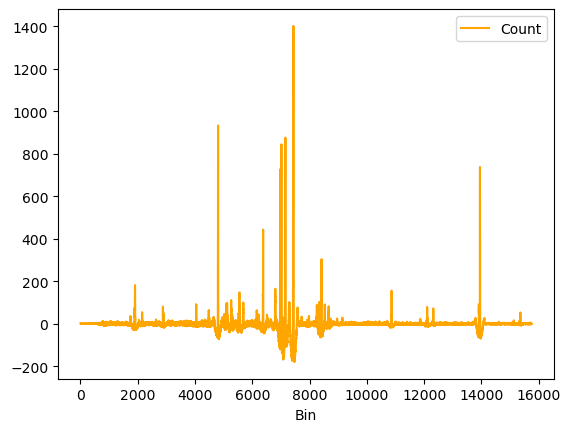

In [5]:
chan1.plot_channel(True)

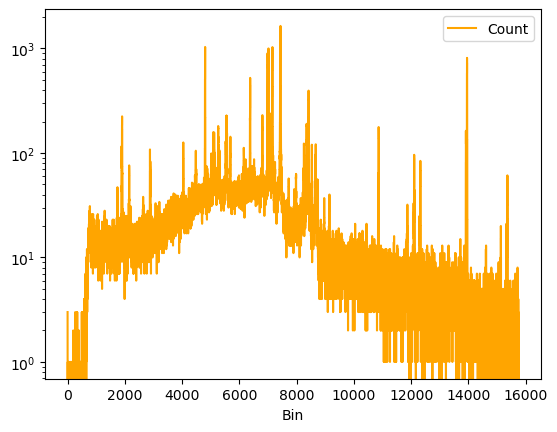

In [6]:
chan1.plot_channel()

In [12]:
d2 = savgol_filter(channels.loc['chan1', 'energy'], 10, 3, deriv = 2)
print(min(d2), max(d2))

-1136.064 1209.3857
